In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
import pandas as pd

# upload the file to colab
from google.colab import files
uploaded = files.upload()

# read the excel file
xls = pd.ExcelFile('SOCIAL MEDIA_ UR + FMS.xlsx')

# load the sheets into dataframes
df1 = pd.read_excel(xls, 'UR + FMS FOLLOWERS')
df2 = pd.read_excel(xls, 'MCS FOLLOWERS')
df3 = pd.read_excel(xls, 'SOCIAL MEDIA UR + FMS 2023')
df4 = pd.read_excel(xls, 'SOCIAL MEDIA ORIGEN 2023')
df5 = pd.read_excel(xls, 'VIEWS 2022 FMS GLOBAL | YOUTUBE')
df6 = pd.read_excel(xls, 'VIEWS 2023 FMS GLOBAL | YOUTUBE')

Saving SOCIAL MEDIA_ UR + FMS.xlsx to SOCIAL MEDIA_ UR + FMS.xlsx


Saving SOCIAL MEDIA_ UR + FMS.xlsx to SOCIAL MEDIA_ UR + FMS (1).xlsx


<ipython-input-3-8dd63a83e73e>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='LIGA', y='SEGUIDORES_mil', hue='Platform', data=df_grouped, ci=None)


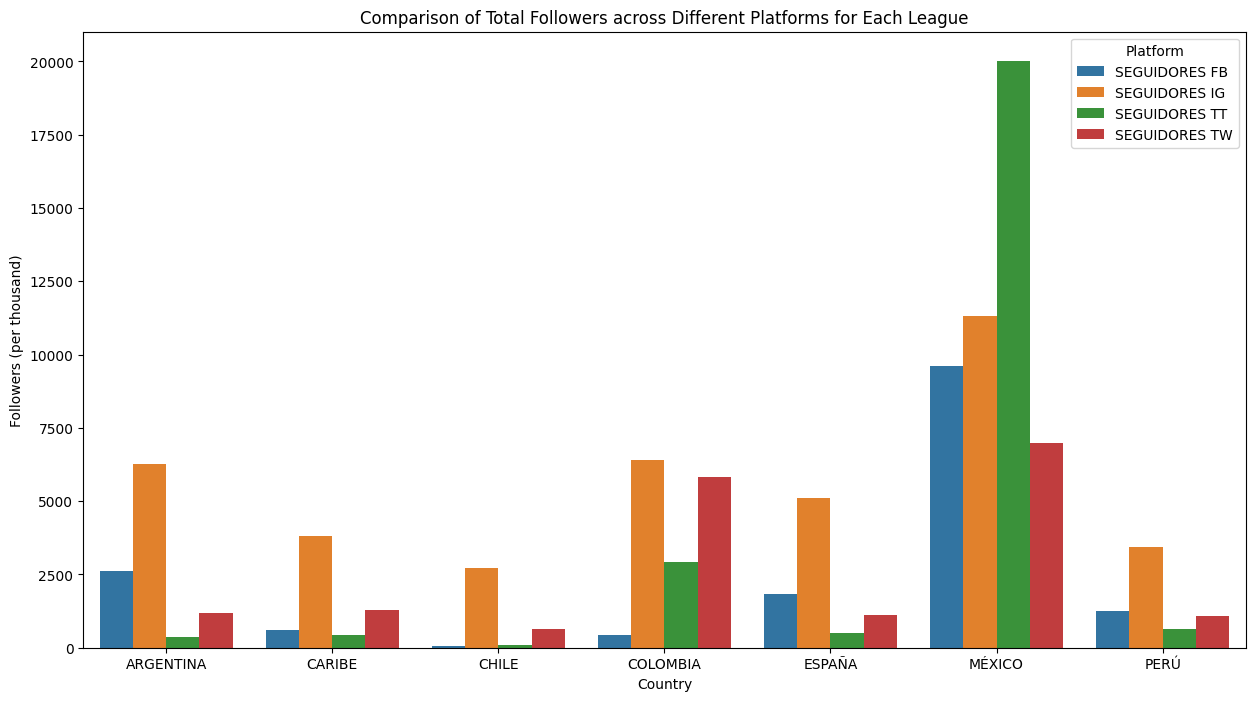

In [3]:
uploaded = files.upload()

# ensure the file name here matches the file you uploaded
df = pd.read_excel('SOCIAL MEDIA_ UR + FMS.xlsx', sheet_name='MCS FOLLOWERS')

# Melting the DataFrame from wide to long format
df_melted = df.melt(id_vars=['LIGA', 'ARTISTA', 'TOTAL SEGUIDORES'],
                    value_vars=['SEGUIDORES IG', 'SEGUIDORES TW', 'SEGUIDORES FB', 'SEGUIDORES TT'],
                    var_name='Platform', value_name='SEGUIDORES')

# Group by 'LIGA' and 'Platform' and calculate the sum of 'SEGUIDORES' for each group
df_grouped = df_melted.groupby(['LIGA', 'Platform'])['SEGUIDORES'].sum().reset_index()

# Transform the followers into thousands for better readability
df_grouped['SEGUIDORES_mil'] = df_grouped['SEGUIDORES'] / 1000

plt.figure(figsize=(15, 8))
sns.barplot(x='LIGA', y='SEGUIDORES_mil', hue='Platform', data=df_grouped, ci=None)

plt.title('Comparison of Total Followers across Different Platforms for Each League')
plt.xlabel('Country')
plt.ylabel('Followers (per thousand)')
plt.show()

<ipython-input-8-1dc3dba4c622>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_metrics_per_league = df3.groupby('CUENTA').mean()


NameError: ignored

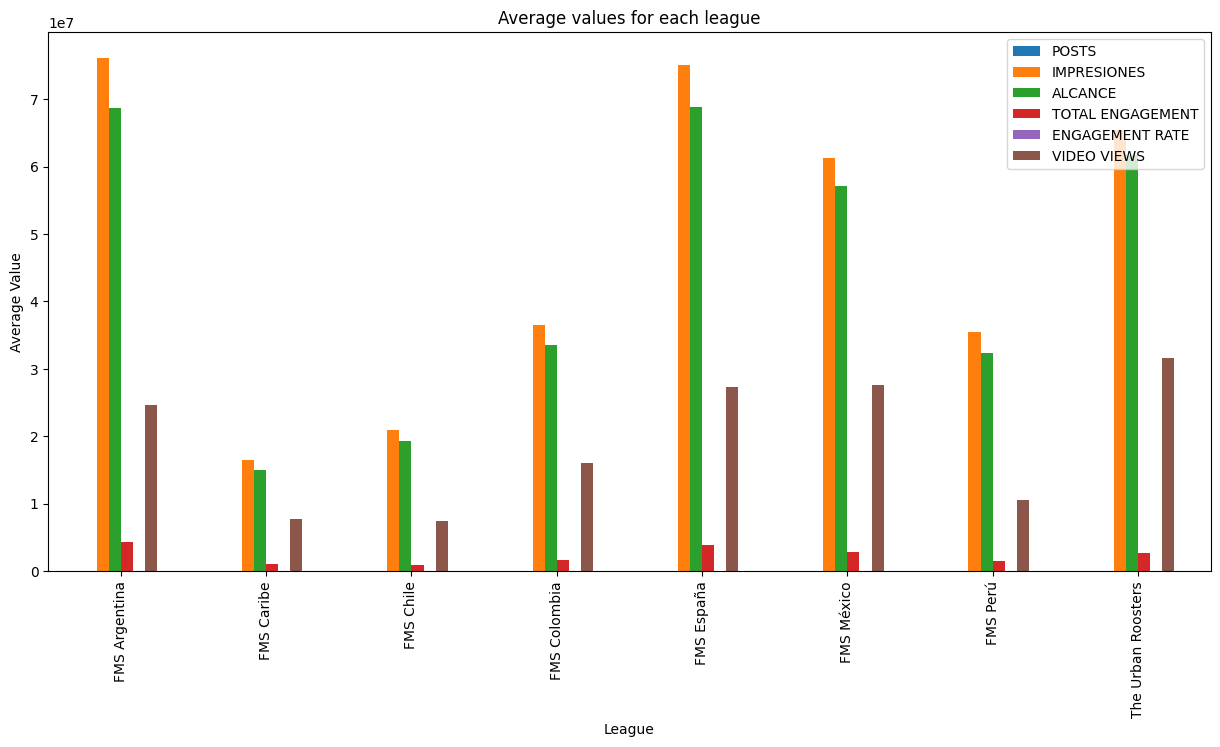

In [8]:
# Calculate mean values for metrics grouped by 'CUENTA' (rap league)
mean_metrics_per_league = df3.groupby('CUENTA').mean()

# Plot the average values for each league
mean_metrics_per_league[['POSTS', 'IMPRESIONES', 'ALCANCE', 'TOTAL ENGAGEMENT', 'ENGAGEMENT RATE', 'VIDEO VIEWS']].plot(kind='bar', figsize=(15,7))
plt.title('Average values for each league')
plt.xlabel('League')
plt.ylabel('Average Value')

ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks()])
plt.ylim(bottom=0, top=mean_metrics_per_league[['POSTS', 'IMPRESIONES', 'ALCANCE', 'TOTAL ENGAGEMENT', 'ENGAGEMENT RATE', 'VIDEO VIEWS']].max().max())
plt.show()

Saving SOCIAL MEDIA_ UR + FMS.xlsx to SOCIAL MEDIA_ UR + FMS (2).xlsx


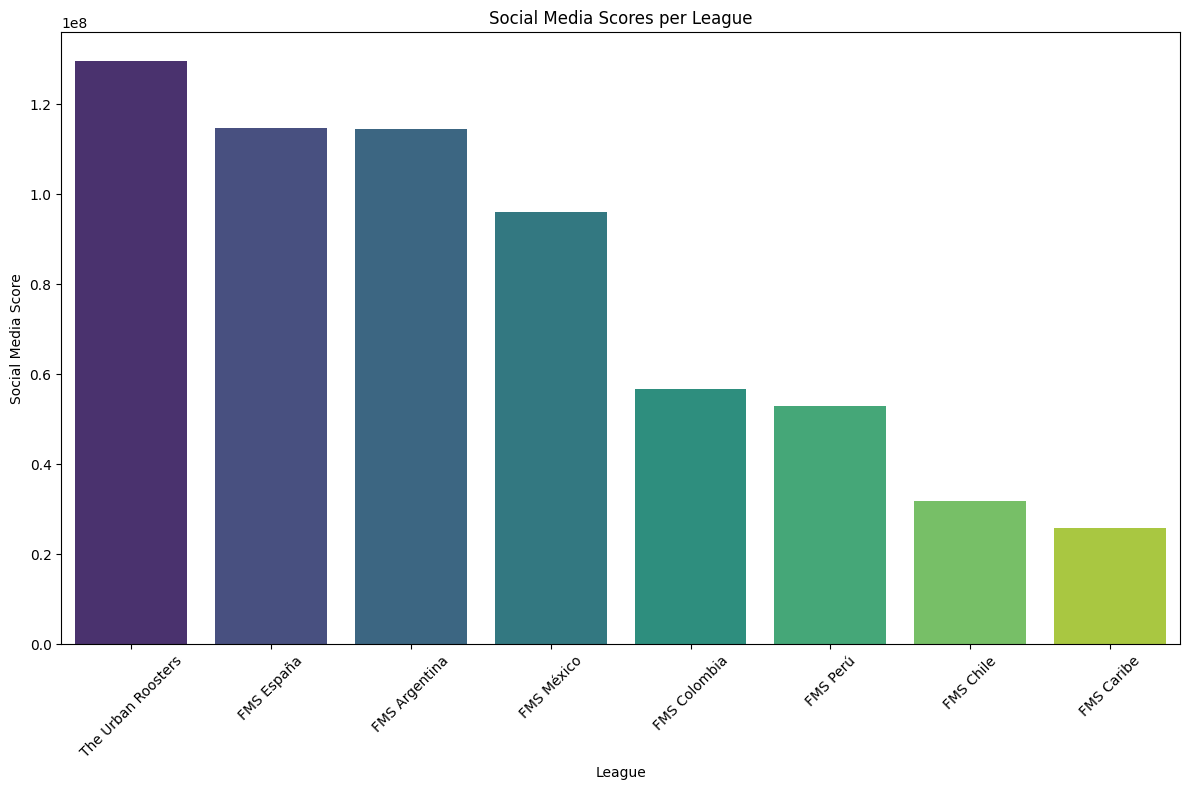

In [9]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

uploaded = files.upload()

# Ensure the file name here matches the file you uploaded
df = pd.read_excel('SOCIAL MEDIA_ UR + FMS.xlsx', sheet_name='SOCIAL MEDIA UR + FMS 2023')

# Define columns to convert (excluding non-numeric columns)
columns_to_convert = ['POSTS', 'IMPRESIONES', 'ALCANCE', 'TOTAL ENGAGEMENT', 'ENGAGEMENT RATE', 'COMENTS & SHARES', 'VIDEO VIEWS', 'LINK CLICKS']

# Convert columns to numeric
for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Define weights for each column
weights = {
    'POSTS': 0.1,
    'IMPRESIONES': 0.2,
    'ALCANCE': 0.15,
    'TOTAL ENGAGEMENT': 0.15,
    'ENGAGEMENT RATE': 0.1,
    'COMENTS & SHARES': 0.1,
    'VIDEO VIEWS': 0.1,
    'LINK CLICKS': 0.1
}

# Calculate the weighted score for each row
df['WEIGHTED_SCORE'] = df[columns_to_convert].multiply(pd.Series(weights)).sum(axis=1)

# Group by 'CUENTA' and sum the weighted scores per platform and league
df_grouped = df.groupby(['CUENTA', 'RED SOCIAL'])['WEIGHTED_SCORE'].sum().reset_index()

# Sum the scores per league
df_grouped_league = df_grouped.groupby('CUENTA')['WEIGHTED_SCORE'].sum().reset_index()

# Sort by scores
df_grouped_league = df_grouped_league.sort_values('WEIGHTED_SCORE', ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=df_grouped_league, x='CUENTA', y='WEIGHTED_SCORE', palette='viridis')
plt.title('Social Media Scores per League')
plt.xlabel('League')
plt.ylabel('Social Media Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
# Replace nulls with 0
df1.fillna(0, inplace=True)
df2.fillna(0, inplace=True)
df3.fillna(0, inplace=True)
df4.fillna(0, inplace=True)
df5.fillna(0, inplace=True)
df6.fillna(0, inplace=True)

X = df2[['SEGUIDORES IG', 'SEGUIDORES TW', 'SEGUIDORES FB', 'SEGUIDORES TT']] # these are just example features
y = df2['TOTAL SEGUIDORES']

# splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# creating the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# making predictions
y_pred = model.predict(X_test)

# evaluating the model
print('R^2:', r2_score(y_test, y_pred))

R^2: 1.0


In [11]:
pip install pandas matplotlib seaborn


R^2: 1.0


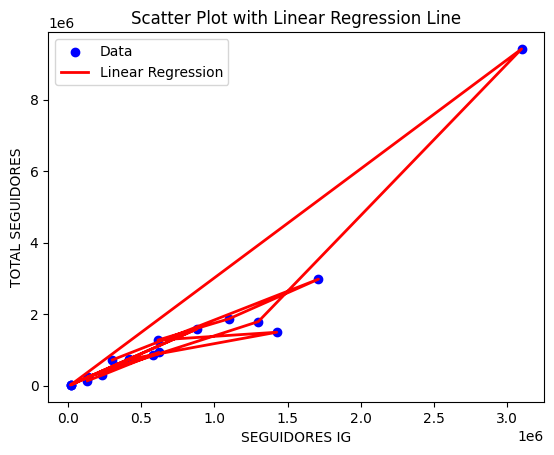

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Replace nulls with 0
df1.fillna(0, inplace=True)
df2.fillna(0, inplace=True)
df3.fillna(0, inplace=True)
df4.fillna(0, inplace=True)
df5.fillna(0, inplace=True)
df6.fillna(0, inplace=True)

X = df2[['SEGUIDORES IG', 'SEGUIDORES TW', 'SEGUIDORES FB', 'SEGUIDORES TT']]  # these are just example features
y = df2['TOTAL SEGUIDORES']

# splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# creating the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# making predictions
y_pred = model.predict(X_test)

# evaluating the model
print('R^2:', r2_score(y_test, y_pred))

# Plotting the scatter plot and the linear regression line
plt.scatter(X_test['SEGUIDORES IG'], y_test, color='blue', label='Data')
plt.plot(X_test['SEGUIDORES IG'], y_pred, color='red', linewidth=2, label='Linear Regression')

plt.xlabel('SEGUIDORES IG')
plt.ylabel('TOTAL SEGUIDORES')
plt.legend()
plt.title('Scatter Plot with Linear Regression Line')
plt.show()

Linear model is not appropriate